## Test flux calculations

Testing output of ```fluxes.py```.

In [76]:
import os

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Local code
import thermo
import rangescaler

%matplotlib inline

In [77]:
dir_flux = "./fluxes_levlegs/"
fnames_flux = [f for f in os.listdir(dir_flux) if f.endswith('.nc')]

In [78]:
dir_prf = "../../data/WP3/cloud_modules/"
fnames_prf = [f for f in os.listdir(dir_prf) if f.endswith('.nc')]

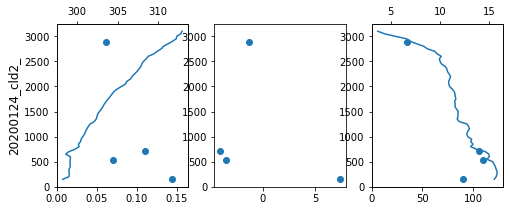

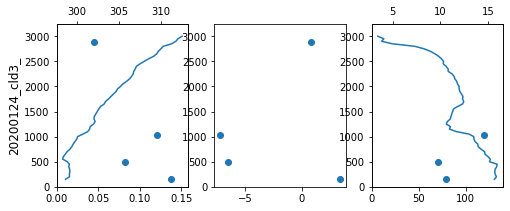

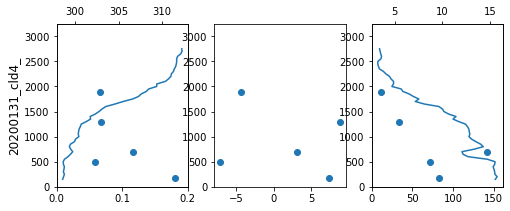

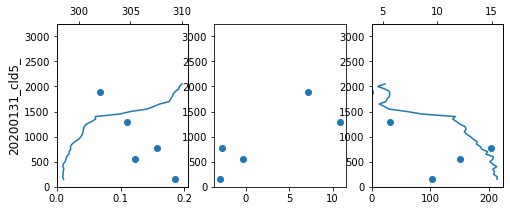

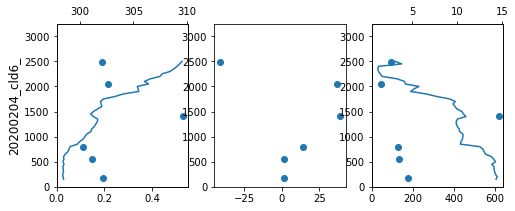

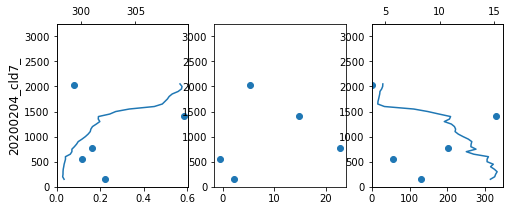

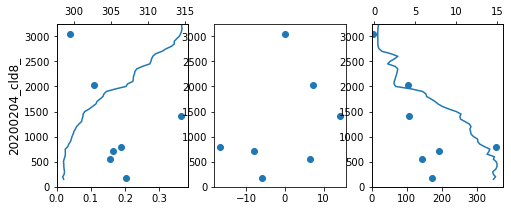

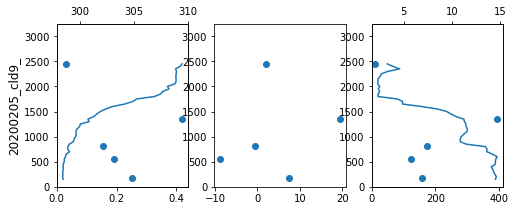

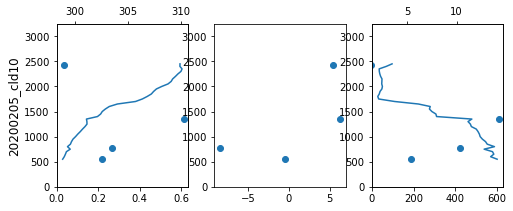

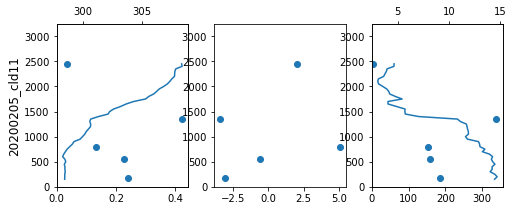

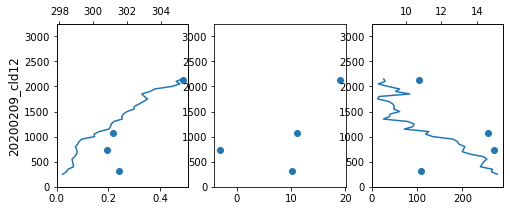

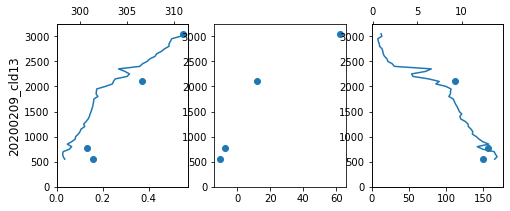

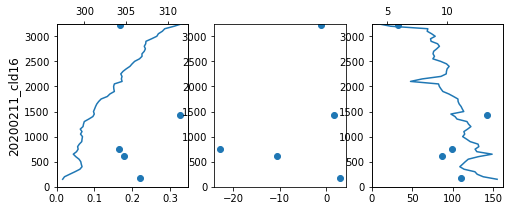

In [74]:
ncld = np.arange(1, 17, 1).astype(str)

for n in ncld:
    
    fname_flux = [f for f in fnames_flux if "_cld%s_" % n in f]
    if len(fname_flux) == 0: continue
    fname_flux = fname_flux[0]
    fname_prf = [f for f in fnames_prf if "_%s.nc" % n.zfill(2) in f]
    fname_prf = fname_prf[0]
    
    
    fluxes = xr.load_dataset(dir_flux + fname_flux)
    prf = xr.load_dataset(dir_prf + fname_prf)
    prfmean = prf.groupby(np.round(prf['alt']/50)*50).mean()

    
    fig, axes = plt.subplots(1, 3, figsize=(8, 3))
    for k, ax in zip(["w'w'_bar", "flux_sh", "flux_lh"], axes):
        ax.scatter(fluxes[k], fluxes['alt'])
    
    
    axes[2].twiny().plot(prfmean['mr'], prfmean['alt'])
    theta = thermo.ptemp(prfmean['Ta'], prfmean['press'])
    axes[0].twiny().plot(theta, prfmean['alt'])
    
    
    axes[0].set_ylabel(fname_flux[4:18], fontsize=12)
    for ax in axes:
        ax.set_ylim(0, 3250)
    axes[0].set_xlim(0, np.max(fluxes["w'w'_bar"]+0.02))
    axes[2].set_xlim(0, np.max(fluxes["flux_lh"]+20))



## Profiles with scaled altitude

In [145]:
keyalts = pd.read_csv("./cldmod_keyaltitudes.csv")
g1 = (keyalts['ncld']>=4) & (keyalts['ncld']<=11)
keyalts_g1 = keyalts.loc[g1]
keyalts_g2 = keyalts.loc[~g1 & (keyalts['z_mltop']!=(-1))]

In [146]:
print(keyalts_g1)
print("")
print(keyalts_g2)

    ncld  z_mltop  z_tradeinversion
3      4    510.0            1580.0
4      5    450.0            1390.0
5      6    630.0            1720.0
6      7    580.0            1400.0
7      8    730.0            1900.0
8      9    680.0            1300.0
9     10    500.0            1350.0
10    11    520.0            1350.0

    ncld  z_mltop  z_tradeinversion
1      2    620.0               NaN
2      3    490.0               NaN
11    12      NaN               NaN
12    13    500.0            1950.0
15    16      NaN               NaN


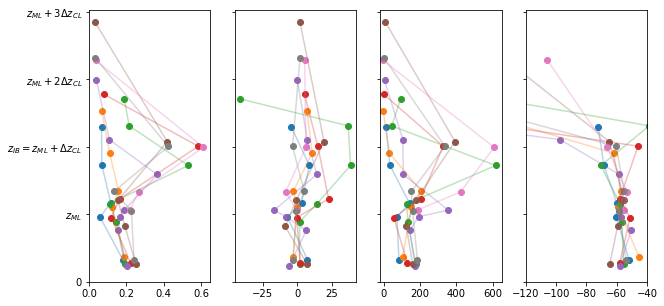

In [150]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

for n in keyalts_g1['ncld']:
    
    n = str(n)
    keyalt_info = keyalts_g1.loc[keyalts_g1['ncld']==int(n)]
    
    fname_flux = [f for f in fnames_flux if "_cld%s_" % n in f]
    if len(fname_flux) == 0: continue
    fname_flux = fname_flux[0]
    fname_prf = [f for f in fnames_prf if "_%s.nc" % n.zfill(2) in f]
    fname_prf = fname_prf[0]
    
    
    fluxes = xr.load_dataset(dir_flux + fname_flux)
    prf = xr.load_dataset(dir_prf + fname_prf)
    prfmean = prf.groupby(np.round(prf['alt']/50)*50).mean()

    zflux_scaled = rangescaler.piecewise_linscale(
        fluxes['alt'].values, (0, keyalt_info['z_mltop'].values, keyalt_info['z_tradeinversion'].values), 
        (0,1,2)
        )
    
    for k, ax in zip(["w'w'_bar", "flux_sh", "flux_lh", "dD_flux"], axes):
        ax.scatter(fluxes[k], zflux_scaled)
        ax.plot(fluxes[k], zflux_scaled, alpha=0.3)
        
    
axes[0].set_xlim(0, 0.65)
axes[2].set_xlim(-20, 650)
axes[3].set_xlim(-120, -40)
yticks = [0,1,2,3,4]
for ax in axes:
    ax.set_yticks(yticks)
axes[0].set_yticklabels([
    "0", r"$z_{ML}$", r"$z_{IB} = z_{ML} + \Delta z_{CL}$", 
    r"$z_{ML} + 2\Delta z_{CL}$", r"$z_{ML} + 3\Delta z_{CL}$"
    ])
for ax in axes[1:]: ax.set_yticklabels(["" for t in yticks])

(-120.0, -40.0)

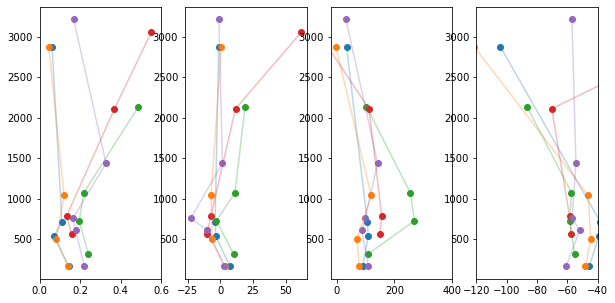

In [148]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

for n in keyalts_g2['ncld']:
    
    n = str(n)
    keyalt_info = keyalts_g2.loc[keyalts_g2['ncld']==int(n)]
    
    fname_flux = [f for f in fnames_flux if "_cld%s_" % n in f]
    if len(fname_flux) == 0: continue
    fname_flux = fname_flux[0]
    fname_prf = [f for f in fnames_prf if "_%s.nc" % n.zfill(2) in f]
    fname_prf = fname_prf[0]
    
    
    fluxes = xr.load_dataset(dir_flux + fname_flux)
    prf = xr.load_dataset(dir_prf + fname_prf)
    prfmean = prf.groupby(np.round(prf['alt']/50)*50).mean()

    #flux_scaled = rangescaler.piecewise_linscale(
    #   fluxes['alt'].values, (0, keyalt_info['z_mltop'].values, keyalt_info['z_tradeinversion'].values), 
    #   (0,1,2)
    #   )
    
    for k, ax in zip(["w'w'_bar", "flux_sh", "flux_lh", "dD_flux"], axes):
        #x.scatter(fluxes[k], zflux_scaled)
        #x.plot(fluxes[k], zflux_scaled, alpha=0.3)
        ax.scatter(fluxes[k], fluxes['alt'])
        ax.plot(fluxes[k], fluxes['alt'], alpha=0.3)
    
axes[0].set_xlim(0, 0.6)
axes[2].set_xlim(-20, 400)
axes[3].set_xlim(-120, -40)
#ticks = [0,1,2,3,4]
#or ax in axes:
#   ax.set_yticks(yticks)
#xes[0].set_yticklabels([
#   "0", r"$z_{ML}$", r"$z_{IB} = z_{ML} + \Delta z_{CL}$", 
#   r"$z_{ML} + 2\Delta z_{CL}$", r"$z_{ML} + 3\Delta z_{CL}$"
#   ])
#or ax in axes[1:]: ax.set_yticklabels(["" for t in yticks])

In [89]:
n=4

In [122]:
keyalt_info = keyalts_g1.loc[keyalts_g1['ncld']==int(n)]
n = str(n)

In [123]:
print(keyalt_info)
print(keyalt_info['z_mltop'])

   ncld  z_mltop  z_tradeinversion
9    10    500.0            1350.0
9    500.0
Name: z_mltop, dtype: float64


In [124]:
fname_flux = [f for f in fnames_flux if "_cld%s_" % n in f]
fname_flux = fname_flux[0]
fname_prf = [f for f in fnames_prf if "_%s.nc" % n.zfill(2) in f]
fname_prf = fname_prf[0]

fluxes = xr.load_dataset(dir_flux + fname_flux)
prf = xr.load_dataset(dir_prf + fname_prf)
prfmean = prf.groupby(np.round(prf['alt']/50)*50).mean()

In [125]:
fluxes['alt'].values

array([ 556.,  781., 1342., 2437.])

In [126]:
zflux_scaled = rangescaler.piecewise_linscale(
    fluxes['alt'].values, (0, keyalt_info['z_mltop'].values, keyalt_info['z_tradeinversion'].values), 
    (0,1,2)
    )

In [127]:
print(zflux_scaled)

[1.06588235 1.33058824 1.99058824 3.27882353]


In [128]:
fluxes

<xarray.Dataset>
Dimensions:       (n_levleg: 4)
Coordinates:
  * n_levleg      (n_levleg) int32 1 2 3 4
    alt           (n_levleg) float64 556.0 781.0 1.342e+03 2.437e+03
Data variables:
    u'w'_bar      (n_levleg) float64 0.02721 0.01579 -0.1426 -0.0001483
    v'w'_bar      (n_levleg) float64 -0.003532 -0.005292 -0.09433 -0.007858
    w'w'_bar      (n_levleg) float64 0.2185 0.2648 0.6126 0.0346
    T'w'_bar      (n_levleg) float64 -0.000439 -0.007668 0.005992 0.005904
    q'w'_bar      (n_levleg) float64 0.06765 0.1555 0.2353 -0.001913
    qD'w'_bar     (n_levleg) float64 9.957e-06 2.293e-05 3.421e-05 -2.665e-07
    T_mean        (n_levleg) float64 301.0 299.0 296.0 295.0
    P_mean        (n_levleg) float64 957.4 934.9 878.8 769.3
    reftime       (n_levleg) float64 3.09e+06 3.09e+06 3.091e+06 3.093e+06
    frac_imputed  (n_levleg) float64 0.07633 0.2429 0.2262 0.05534
    flux_sh       (n_levleg) float64 -0.4887 -8.39 6.225 5.388
    flux_lh       (n_levleg) float64 187.4 423.5 608.6 -4.346
    dD_flux       (n_levleg) float64 -55.09 -53.22 -66.54 -105.8
Attributes:
    description:  Fluxes from P-3 level legs during ATOMIC, computed from 5Hz...